## Resolución guía prof. Carlos Dibarbora - Procesamiento señales
(Teoría en el campus)

#### ejercicio 1: 
La función $f(t) = t$ entre $-\pi$ y $\pi$  de manera periódica, es decir que  el periodo $T = 2\pi$ se denomina diente de sierra.<br>
Calcular los coeficientes nos da <br>
\begin{equation}
a_n \,= \,\frac{1}{\pi}\int_{-\pi}^{\pi} x \,\cos{nx}\, dx\, =\, 0\, ,  n\ >= 0
\end{equation}

\begin{equation}
b_n \,= \,\frac{1}{\pi}\int_{-\pi}^{\pi} x \,\sin{nx}\, dx\, =\, -\frac{2}{n}\cos{n\pi}
\end{equation}
Por lo que la serie sería
\begin{equation}
f(t)\, = \, \sum_{n=1}^{N} - (2\frac{\cos{n\pi}}{n} \, \sin{\frac{2n\pi}{n\pi} t})
\end{equation}
Graficar la funcion y realizar un programa que sume armónicos, graficar la función aproximada por la serie N = 100 armónicos.

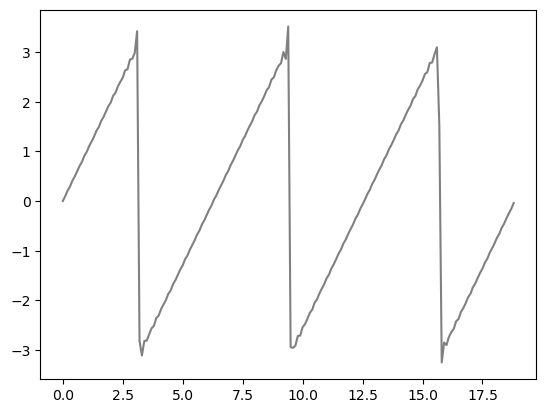

In [1]:
#armo un vector de por ejemplo  t de de 0 a 6 pi 
#y por ejemplo meto un loop con distintos n que vayan sumando sobre el mismo vector.

import numpy as np 
import matplotlib.pyplot as plt

N = 100

def fourier(n,t):
    return -(2* np.cos(n * np.pi)/ n )*np.sin(n*t)

# periodo
t = np.arange(0, 6*np.pi, 0.1)

# armonicos
a = np.zeros(len(t)) 

for n in range(1,N):
    a += fourier(n,t)

plt.plot(t, a, color = 'gray')

#### Ejercicio 2
Cargar en diferentes vectores una señal senoidal de 5 Hz y 3 segundos de duración con frecuencias de muestreo de 10 Hz (lo mínimo necesario según el teorema), 100 Hz y una frecuencia de muestreo menor 10 Hz. Graficarlos (en gráficos distintos) y discutirlo con compañerxs y docente.


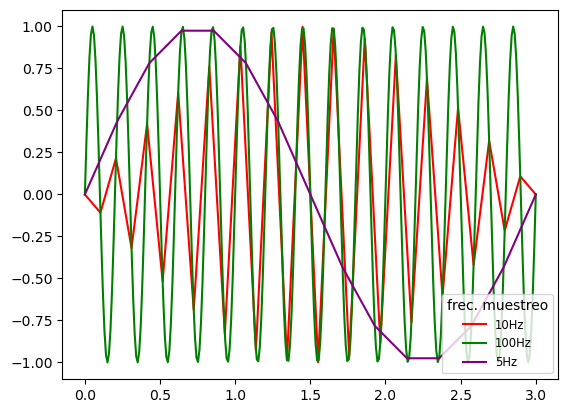

In [2]:

tiempo = 3
frec = 5 
def senial(tiempo,frec,frecmuestreo):
    t = np.linspace(0,tiempo,frecmuestreo * tiempo)
    w = 2 * np.pi * frec
    return t, np.sin(w*t)

frecmuestreo = 10
t, s =senial(tiempo,frec,frecmuestreo)
plt.plot(t,s, color = 'red', label = str(frecmuestreo) + 'Hz' )
frecmuestreo = 100
t, s =senial(tiempo,frec,frecmuestreo)
plt.plot(t,s, color = 'green',label = str(frecmuestreo) + 'Hz')
frecmuestreo = 5
t, s =senial(tiempo,frec,frecmuestreo)
plt.plot(t,s, color = 'purple',label = str(frecmuestreo) + 'Hz')

plt.legend(title = 'frec. muestreo', loc = 4, fontsize = 'small', fancybox = True)
plt.show()


#### Ejercicio 3
Crear una señal sumando varias funciones senoidales con distintas frecuencias. Transformarla y analizar el espectro.
Nota: las frecuencias son unidimensionales.

frecuencia de la señal 0: 20 ,coef de la señal 0: []
frecuencia de la señal 1: 23 ,coef de la señal 1: [6]
frecuencia de la señal 2: 26 ,coef de la señal 2: [6 4]
frecuencia de la señal 3: 13 ,coef de la señal 3: [6 4 1]


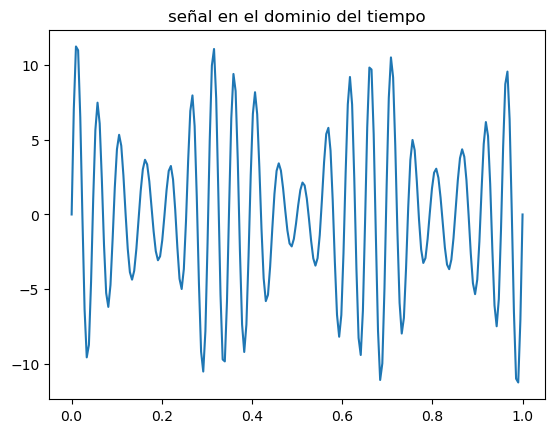

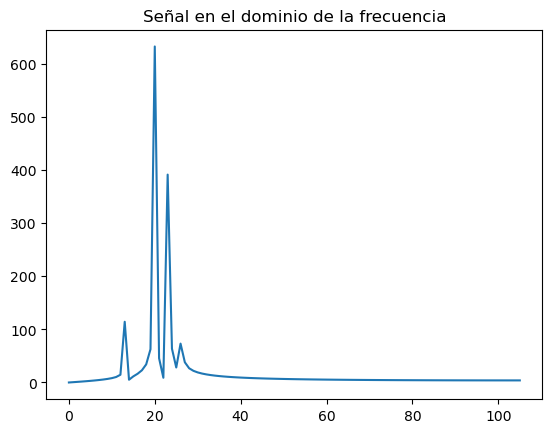

In [31]:
def random_senial(t):
    #supongamos una frecuencia random entre 1 y 10
    coef = np.random.randint(1,10)
    f = np.random.randint(1,35)
    w = 2 * np.pi * f 
    return f,coef, coef * np.sin(w * t)

n = 4 #cantidad de señales
frecmuestreo = 210
tiempo = 1
t = np.linspace(0,tiempo,frecmuestreo)
s = np.zeros(len(t))
frec = np.array([],dtype = int)
coef = np.array([],dtype = int)
for i in range (n):
    f,c,senial = random_senial(t)
    print(f'frecuencia de la señal {i}: {f} ,coef de la señal {i}: {coef}')
    s += senial
    frec = np.append(frec,f)
    coef = np.append(coef,c)
    
plt.plot(t,s)
plt.title('señal en el dominio del tiempo')
plt.show()

#transformada de Fourier!
s_fft = np.fft.rfft(s) # te devuelve intensidades de frecuencia, donde cada indice es la intensidad de cada frecuencia. Las freciencias van a ser la mitad de la frecuencia de muestreo por lo menos para el teorema del muestreo.
#funcion del paquete fft que se utiliza para obtener el dominio de la frecuencia, se pasa por parámetro el vector tiempo y el periodo o paso.
s_frec=np.fft.rfftfreq(t.size, d = 1/frecmuestreo)
plt.title('Señal en el dominio de la frecuencia')
plt.plot(s_frec, abs(s_fft)) # el abs es por que no queremos la parte imaginaria

#### Ejercicio 4
Agregar ruido aleatoreo a la señal. Analizar el espectro.

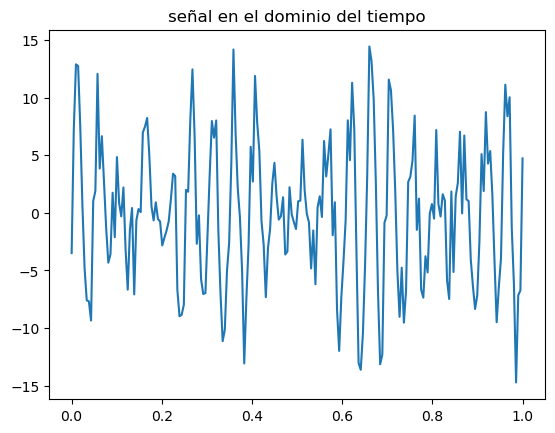

/var/folders/bs/tw4_fj_s65l_vxvt7mr7wb500000gn/T/ipykernel_43075/2636521045.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  sr_fft = np.fft.rfft(sr).astype(int) # te devuelve intensidades de frecuencia, donde cada indice es la intensidad de cada frecuencia. Las freciencias van a ser la mitad de la frecuencia de muestreo por lo menos para el teorema del muestreo.


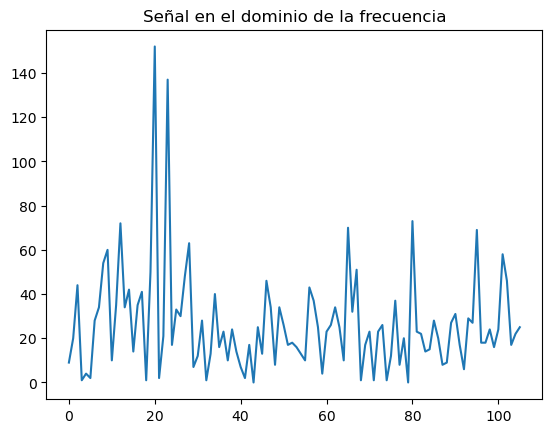

In [37]:

sr = s + np.random.random(len(s))*(5 - (- 5)) - 5
plt.plot(t,sr)
plt.title('señal en el dominio del tiempo')
plt.show()

#transformada de Fourier!
sr_fft = np.fft.rfft(sr).astype(int) # te devuelve intensidades de frecuencia, donde cada indice es la intensidad de cada frecuencia. Las freciencias van a ser la mitad de la frecuencia de muestreo por lo menos para el teorema del muestreo.
#funcion del paquete fft que se utiliza para obtener el dominio de la frecuencia, se pasa por parámetro el vector tiempo y el periodo o paso.
sr_frec=np.fft.rfftfreq(t.size, d = 1/frecmuestreo)
plt.title('Señal en el dominio de la frecuencia')
plt.plot(sr_frec, abs(sr_fft)) # el abs es por que no queremos la parte imaginaria



#### Ejercicio 5
Realizar un filtro para el ruido de la señal operando sobre el espectro, realizar la antitransformada de Fourier (irfft(s)) para recuperar la señal sin ruido, graficar y comparar.


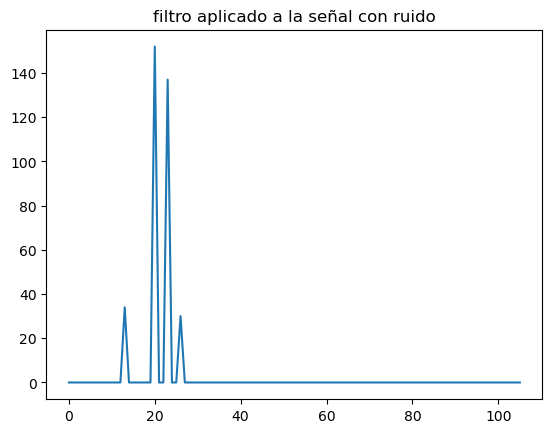

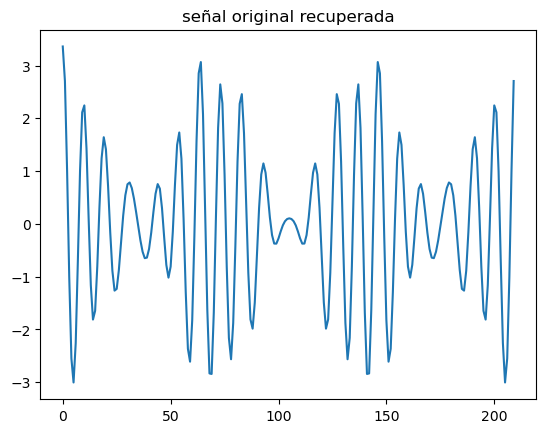

In [66]:

mask = np.zeros(len(sr_fft)).astype(int)
for i in frec.astype(int):
    for j in sr_fft.astype(int):
        if j == i:
            mask[j]=1 
srf_fft = sr_fft * mask

plt.plot(sr_frec, abs(srf_fft))
plt.title('filtro aplicado a la señal con ruido')
plt.show()

#recupero la señal original
srf = np.fft.irfft(srf_fft)
plt.plot(srf)
plt.title('señal original recuperada')
plt.show()